<a href="https://colab.research.google.com/github/barta3235/working_model_UNET/blob/main/working_model_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, applications, Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
!pip install lime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/499 Dataset/Ohyes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/drive/MyDrive/499 Dataset/noppers')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
print(len(X))
for i in range(1,3245):
    y.append('N')
print(y)

  0%|          | 0/4272 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/3244 [00:00<?, ?it/s]

7516
['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',

In [ ]:
print(len(X))
print(len(y))

7516
7516


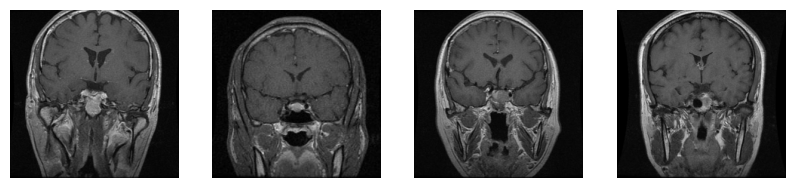

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)


X_train Shape:  (5035, 224, 224, 3)
X_test Shape:  (2481, 224, 224, 3)
y_train Shape:  (5035, 2)
y_test Shape:  (2481, 2)


In [ ]:
!pip install efficientnet

In [ ]:
# from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input, Dropout, multiply, GlobalAveragePooling2D, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications import EfficientNetB0  # Changed from B4 to B0
# import tensorflow as tf

# print("TF Version: ", tf.__version__)

# def conv_block(inputs, num_filters, dropout_rate=None):
#     x = Conv2D(num_filters, 3, padding="same")(inputs)
#     x = BatchNormalization()(x)
#     x = Activation("relu")(x)

#     x = Conv2D(num_filters, 3, padding="same")(x)
#     x = BatchNormalization()(x)
#     x = Activation("relu")(x)

#     if dropout_rate:
#         x = Dropout(dropout_rate)(x)

#     return x

# def attention_block(input_tensor, input_tensor_skip):
#     """ Attention Mechanism """
#     attention_feature = Conv2D(input_tensor_skip.get_shape()[-1], 1, padding='same', activation='sigmoid')(input_tensor)
#     attention_feature = multiply([input_tensor_skip, attention_feature])
#     return attention_feature

# def decoder_block(inputs, skip, num_filters):
#     x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
#     skip = attention_block(x, skip)  # Apply attention mechanism before concatenation
#     x = Concatenate()([x, skip])
#     x = conv_block(x, num_filters, dropout_rate=0.1)  # Adding dropout_rate for regularization
#     return x

# def build_effienet_unet(input_shape, efficientnet='b0'):
#     """ Input """
#     inputs = Input(input_shape)

#     """ Pre-trained Encoder """
#     if efficientnet == 'b0':
#         encoder = EfficientNetB0(include_top=False, weights="imagenet", input_tensor=inputs)

#     # Adjust the layer names based on the EfficientNetB0 architecture
#     s1 = encoder.get_layer("input_1").output  # Adjust if necessary
#     s2 = encoder.get_layer("block2a_expand_activation").output
#     s3 = encoder.get_layer("block3a_expand_activation").output
#     s4 = encoder.get_layer("block4a_expand_activation").output

#     """ Bottleneck """
#     b1 = encoder.get_layer("block6a_expand_activation").output

#     """ Decoder """
#     d1 = decoder_block(b1, s4, 512)
#     d2 = decoder_block(d1, s3, 256)
#     d3 = decoder_block(d2, s2, 128)
#     d4 = decoder_block(d3, s1, 64)

#     # For a binary classification task
#     x = GlobalAveragePooling2D()(d4)  # Use the last decoder block's output
#     outputs = Dense(2, activation='softmax')(x)  # Adjust the number of units and activation based on your specific task
#     model = Model(inputs, outputs, name="EfficientNetB0_UNET_Classification")

#     return model

# input_shape = (224, 224, 3)
# model = build_effienet_unet(input_shape)  # Default is now 'b0'
# model.summary()










from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf

print("TF Version: ", tf.__version__)

def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def decoder_block(inputs, skip, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip])
    x = conv_block(x, num_filters)
    return x

def build_effienet_unet(input_shape):
    """ Input """
    inputs = Input(input_shape)

    """ Pre-trained Encoder """
    encoder = EfficientNetB0(include_top=False, weights="imagenet", input_tensor=inputs)

    s1 = encoder.get_layer("input_3").output                      ## 256
    s2 = encoder.get_layer("block2a_expand_activation").output    ## 128
    s3 = encoder.get_layer("block3a_expand_activation").output    ## 64
    s4 = encoder.get_layer("block4a_expand_activation").output    ## 32

    """ Bottleneck """
    b1 = encoder.get_layer("block6a_expand_activation").output    ## 16

    """ Decoder """
    d1 = decoder_block(b1, s4, 512)                               ## 32
    d2 = decoder_block(d1, s3, 256)                               ## 64
    d3 = decoder_block(d2, s2, 128)                               ## 128
    d4 = decoder_block(d3, s1, 64)                                ## 256

    # For a binary classification task
    x = GlobalAveragePooling2D()(d4)  # Use the last decoder block's output
    outputs = Dense(2, activation='softmax')(x)  # Adjust the number of units and activation based on your specific task
    model = Model(inputs, outputs, name="EfficientNetB0_UNET_Classification")
    return model

if __name__ == "__main__":
    input_shape = (224, 224, 3)
    model = build_effienet_unet(input_shape)
    model.summary()




TF Version:  2.15.0
Model: "EfficientNetB0_UNET_Classification"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 224, 224,

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.SpecificityAtSensitivity(0.5)])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    initial_epoch=0)

Epoch 1/5


In [ ]:
model.save('/content/drive/MyDrive')

**LIME Explanantion**

**Test One**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Function to load and preprocess the image
def load_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    # Adjust preprocessing as needed for your model
    img = preprocess_input(img)  # Make sure this matches your model's expected input
    return img

# Adjust this prediction function as per your model's requirements
def predict(model, img_array):
    preds = model.predict(img_array)
    return preds

# Function to explain an instance with LIME
def explain_instance_with_lime(model, img_path, top_labels=2, hide_color=0, num_samples=100):
    explainer = lime_image.LimeImageExplainer()
    img = load_image(img_path)
    explanation = explainer.explain_instance(img[0].astype('double'),
                                             classifier_fn=lambda x: predict(model, x),
                                             top_labels=top_labels,
                                             hide_color=hide_color,
                                             num_samples=num_samples)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

# Assuming 'model' is your fine-tuned model with the provided compilation parameters

# Path to your test image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y2.jpg'  # Update this with the actual path to your image

# Use the function to explain a prediction
explain_instance_with_lime(model, img_path)


**Test Two**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Function to load and preprocess the image
def load_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    # Adjust preprocessing as needed for your model
    img = preprocess_input(img)  # Make sure this matches your model's expected input
    return img

# Adjust this prediction function as per your model's requirements
def predict(model, img_array):
    preds = model.predict(img_array)
    return preds

# Function to explain an instance with LIME
def explain_instance_with_lime(model, img_path, top_labels=2, hide_color=0, num_samples=100):
    explainer = lime_image.LimeImageExplainer()
    img = load_image(img_path)
    explanation = explainer.explain_instance(img[0].astype('double'),
                                             classifier_fn=lambda x: predict(model, x),
                                             top_labels=top_labels,
                                             hide_color=hide_color,
                                             num_samples=num_samples)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()

# Assuming 'model' is your fine-tuned model with the provided compilation parameters

# Path to your test image
img_path = '/content/drive/MyDrive/sampleImagesToTest/4 no.jpg'  # Update this with the actual path to your image

# Use the function to explain a prediction
explain_instance_with_lime(model, img_path)


**Test 3**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Load the pre-trained VGG16 model from your drive
model = load_model('/content/drive/MyDrive/work_temp/model_vgg16_new')

# Load and preprocess the image
def load_image(img_path, model_preprocess=preprocess_input, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = model_preprocess(img_array)
    return img_array

# Specify the path to your image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg'
img_array = load_image(img_path)

# Initialize a LimeImageExplainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction of the model on the input image
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=2, hide_color=0, num_samples=100)

# Get the mask for the explanation of the top class (assuming binary classification)
temp, mask = explanation.get_image_and_mask(model.predict(img_array).argmax(axis=1)[0], positive_only=True, negative_only=False, hide_rest=False)

# Plot the original image and the explanation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Original image
ax1.imshow(image.load_img(img_path))
ax1.set_title('Original Image')

# Lime heatmap
ax2.imshow(mark_boundaries(temp / 2 + 0.5, mask))
ax2.set_title('LIME Heatmap')

plt.tight_layout()
plt.show()


**Super Pixel Boundaries**

**Test One**

In [ ]:
import tensorflow as tf
import numpy as np
from skimage.segmentation import mark_boundaries
from lime.lime_image import LimeImageExplainer
import cv2  # Import OpenCV for image processing
import matplotlib.pyplot as plt

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

sample_index = 0
selected_image_path = '/content/drive/MyDrive/sampleImagesToTest/48 no.jpeg'  # Specify the file path to the image
selected_label = 'Y'

selected_image = cv2.imread(selected_image_path)  # Load the image using OpenCV

explanation = explainer.explain_instance(selected_image, predict_fn, top_labels=1, num_samples=100)

perturbed_image = explanation.segments

superpixel_boundaries = mark_boundaries(selected_image, perturbed_image, color=(1, 0, 0), mode='subpixel')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(superpixel_boundaries)
plt.title('Important Superpixels in Red (LIME)')
plt.show()


**Test Two**

In [ ]:
import tensorflow as tf
import numpy as np
from skimage.segmentation import mark_boundaries
!pip install lime
from lime.lime_image import LimeImageExplainer
import cv2
import matplotlib.pyplot as plt

# Load your pre-trained model
model_path = '/content/drive/MyDrive/work_temp/model_vgg16_new'  # Update with your model path
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

sample_index = 0
selected_image_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg'  # Specify the file path to the image
selected_label = 'Y'

selected_image = cv2.imread(selected_image_path)  # Load the image using OpenCV

explanation = explainer.explain_instance(selected_image, predict_fn, top_labels=1, num_samples=100)

perturbed_image = explanation.segments

superpixel_boundaries = mark_boundaries(selected_image, perturbed_image, color=(1, 0, 0), mode='subpixel')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(superpixel_boundaries)
plt.title('Important Superpixels in Red (LIME)')
plt.show()


**Testing Model**

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_unet_eff_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/Y (88).jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] > prediction[0][1]:
    result = "No Tumor"
else:
    result = "Tumor"

print("Prediction: ", result)


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_unet_eff_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/4 no.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] > prediction[0][1]:
    result = "No Tumor"
else:
    result = "Tumor"

print("Prediction: ", result)


**Grad-CAM**

**Test One**

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_unet_eff_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/Y2.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
img = preprocess_input(img_array_expanded_dims)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
probability = prediction[0][1]
if probability > 0.5:
    result = "Tumor"
else:
    result = "No Tumor"

print("Prediction: ", result)
print("Probability: {:.2f}%".format(probability * 100))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

model_path = '/content/drive/MyDrive/work_temp/model_unet_eff_new'

# Load the pre-trained model
model = load_model(model_path)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Y2N (21).jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'conv2d_163'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite_unett2.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


**Test Two**

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_unet_eff_new'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/sampleImagesToTest/Tr-no_0205.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
img = preprocess_input(img_array_expanded_dims)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
probability = prediction[0][1]
if probability > 0.5:
    result = "Tumor"
else:
    result = "No Tumor"

print("Prediction: ", result)
print("Probability: {:.2f}%".format(probability * 100))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

# Specify the path to your model
model_path = '/content/drive/MyDrive/work_temp/model_unet_eff_new'

# Load the pre-trained model
model = load_model(model_path)

# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/sampleImagesToTest/Tr-no_0205.jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'conv2d_163'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/work_temp/gradcam_composite_unet.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)
